In [1]:
# 1. 행복지수 막대그래프 대륙별, 나라별 
# 2. 상관계수 히트맵
# 3. 상관계수 높은 변수 각각 2개씩 산점도 그리기
# 4. HS가 연도별 차이가 가장 큰 나라 선그래프 그리기 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('Project/pdata/happy_0814.csv')
df['country']= df['country'].astype("category")
df['year']= df['year'].astype("category")
df['country_num']= df['country_num'].astype("category")
df['continent']= df['continent'].astype("category")
ndf=df.sample(frac=1,random_state=4).reset_index(drop=True)  # random_state 안 하면 DW가 실행시마다 달라짐
ndf

,country,year,HS,log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,country_num,continent
0,Nicaragua,2018,5.819,8.647,0.854,67.50,0.797,0.009,0.713,6.7,7.271933,1.606224,13.48,2.404,6.731602,558,Nor.A
1,Ghana,2012,5.057,8.397,0.685,54.86,0.679,0.040,0.898,6.8,2.164331,0.829040,5.47,4.192,2.803341,288,AF
2,Benin,2006,3.330,7.866,0.445,50.10,0.580,-0.011,0.790,2.8,2.483526,0.648848,2.67,5.576,1.761833,204,AF
3,Sri Lanka,2017,4.331,9.440,0.823,67.00,0.827,0.094,0.844,10.9,2.047085,3.587271,9.41,2.206,6.312512,144,AS
4,Bangladesh,2015,4.633,8.216,0.601,62.80,0.815,-0.068,0.721,5.2,0.184365,1.091818,4.26,2.120,5.490531,50,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,Colombia,2011,6.464,9.442,0.904,65.92,0.811,-0.073,0.847,7.5,0.240863,1.313381,9.64,1.958,5.655645,170,SA
1877,India,2014,4.424,8.538,0.621,58.60,0.809,-0.026,0.832,6.1,2.232304,2.190966,4.46,2.333,4.357688,356,AS
1878,Denmark,2017,7.594,10.916,0.952,72.10,0.955,0.155,0.181,12.6,8.592318,1.281387,7.61,1.750,6.558833,208,EU
1879,Bhutan,2014,4.939,9.167,0.880,59.90,0.834,0.268,0.650,3.1,1.656511,1.163591,6.14,2.067,5.800284,64,AS


In [3]:
# HS 정규화 안 함 -> ndfnor

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
x= ndf[['log_gdp', 'social', 'life_exp', 'freedom','generosity', 'corruption', 
       'schooling', 'alcohol', 'suicide','obesity', 'birth', 'mental']]
xnor = MinMaxScaler().fit_transform(x)

ndfnor = pd.DataFrame(xnor)
ndfnor.columns = ['log_gdp', 'social', 'life_exp', 'freedom', 'generosity', 'corruption', 'schooling', 'alcohol',
                     'suicide','obesity', 'birth', 'mental']

# 정규화 안한 컬럼 dfnor에 추가
ndfnor[['HS','year','country','country_num','continent']]= ndf[['HS','year','country','country_num','continent']]
ndfnor

,log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,HS,year,country,country_num,continent
0,0.401356,0.809182,0.785714,0.741403,0.333011,0.715190,0.421875,0.269256,0.215085,0.507264,0.206485,0.530582,5.819,2018,Nicaragua,558,Nor.A
1,0.351486,0.566714,0.503571,0.579092,0.363020,0.910338,0.429688,0.075482,0.093262,0.184019,0.479963,0.179361,5.057,2012,Ghana,288,AF
2,0.245562,0.222382,0.397321,0.442916,0.313650,0.796414,0.117188,0.087591,0.065017,0.071025,0.691649,0.086241,3.330,2006,Benin,204,AF
3,0.559545,0.764706,0.774554,0.782669,0.415295,0.853376,0.750000,0.071034,0.525613,0.343019,0.176201,0.493112,4.331,2017,Sri Lanka,144,AS
4,0.315380,0.446198,0.680804,0.766162,0.258470,0.723629,0.304688,0.000365,0.134452,0.135190,0.163047,0.419619,4.633,2015,Bangladesh,50,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,0.559944,0.880918,0.750446,0.760660,0.253630,0.856540,0.484375,0.002508,0.169182,0.352300,0.138269,0.434382,6.464,2011,Colombia,170,SA
1877,0.379613,0.474892,0.587054,0.757909,0.299129,0.840717,0.375000,0.078060,0.306743,0.143261,0.195626,0.318333,4.424,2014,India,356,AS
1878,0.853980,0.949785,0.888393,0.958735,0.474347,0.154008,0.882812,0.319349,0.164167,0.270379,0.106455,0.515135,7.594,2017,Denmark,208,EU
1879,0.505087,0.846485,0.616071,0.792297,0.583737,0.648734,0.140625,0.056216,0.145703,0.211057,0.154940,0.447314,4.939,2014,Bhutan,64,AS


In [7]:
# HS도 정규화 -> ndfnor2

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
x2= ndf[['log_gdp', 'social', 'life_exp', 'freedom','generosity', 'corruption', 
       'schooling', 'alcohol', 'suicide','obesity', 'birth', 'mental','HS']]
xnor2 = MinMaxScaler().fit_transform(x2)

ndfnor2 = pd.DataFrame(xnor2)
ndfnor2.columns = ['log_gdp', 'social', 'life_exp', 'freedom', 'generosity', 'corruption', 'schooling', 'alcohol',
                     'suicide','obesity', 'birth', 'mental','HS']

ndfnor2[['year','country','country_num','continent']]= ndf[['year','country','country_num','continent']]
ndfnor2

,log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,HS,year,country,country_num,continent
0,0.401356,0.809182,0.785714,0.741403,0.333011,0.715190,0.421875,0.269256,0.215085,0.507264,0.206485,0.530582,0.610206,2018,Nicaragua,558,Nor.A
1,0.351486,0.566714,0.503571,0.579092,0.363020,0.910338,0.429688,0.075482,0.093262,0.184019,0.479963,0.179361,0.475195,2012,Ghana,288,AF
2,0.245562,0.222382,0.397321,0.442916,0.313650,0.796414,0.117188,0.087591,0.065017,0.071025,0.691649,0.086241,0.169206,2006,Benin,204,AF
3,0.559545,0.764706,0.774554,0.782669,0.415295,0.853376,0.750000,0.071034,0.525613,0.343019,0.176201,0.493112,0.346563,2017,Sri Lanka,144,AS
4,0.315380,0.446198,0.680804,0.766162,0.258470,0.723629,0.304688,0.000365,0.134452,0.135190,0.163047,0.419619,0.400071,2015,Bangladesh,50,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,0.559944,0.880918,0.750446,0.760660,0.253630,0.856540,0.484375,0.002508,0.169182,0.352300,0.138269,0.434382,0.724486,2011,Colombia,170,SA
1877,0.379613,0.474892,0.587054,0.757909,0.299129,0.840717,0.375000,0.078060,0.306743,0.143261,0.195626,0.318333,0.363040,2014,India,356,AS
1878,0.853980,0.949785,0.888393,0.958735,0.474347,0.154008,0.882812,0.319349,0.164167,0.270379,0.106455,0.515135,0.924699,2017,Denmark,208,EU
1879,0.505087,0.846485,0.616071,0.792297,0.583737,0.648734,0.140625,0.056216,0.145703,0.211057,0.154940,0.447314,0.454288,2014,Bhutan,64,AS


In [8]:
# 군집분류
from sklearn import cluster
X = ndfnor[['HS']]
kmeans = cluster.KMeans(init='k-means++', n_clusters = 3, n_init = 10)
kmeans.fit(X)                 
cluster_label = kmeans.labels_
print(cluster_label)

[1 1 0 ... 2 1 0]


In [9]:
ndfnor['cluster'] = cluster_label
ndfnor.head()

,log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,HS,year,country,country_num,continent,cluster
0,0.401356,0.809182,0.785714,0.741403,0.333011,0.715190,0.421875,0.269256,0.215085,0.507264,0.206485,0.530582,5.819,2018,Nicaragua,558,Nor.A,1
1,0.351486,0.566714,0.503571,0.579092,0.363020,0.910338,0.429688,0.075482,0.093262,0.184019,0.479963,0.179361,5.057,2012,Ghana,288,AF,1
2,0.245562,0.222382,0.397321,0.442916,0.313650,0.796414,0.117188,0.087591,0.065017,0.071025,0.691649,0.086241,3.330,2006,Benin,204,AF,0
3,0.559545,0.764706,0.774554,0.782669,0.415295,0.853376,0.750000,0.071034,0.525613,0.343019,0.176201,0.493112,4.331,2017,Sri Lanka,144,AS,0
4,0.315380,0.446198,0.680804,0.766162,0.258470,0.723629,0.304688,0.000365,0.134452,0.135190,0.163047,0.419619,4.633,2015,Bangladesh,50,AS,0


In [10]:
ndfnor2['cluster'] = cluster_label
ndfnor2.head()

,log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,HS,year,country,country_num,continent,cluster
0,0.401356,0.809182,0.785714,0.741403,0.333011,0.715190,0.421875,0.269256,0.215085,0.507264,0.206485,0.530582,0.610206,2018,Nicaragua,558,Nor.A,1
1,0.351486,0.566714,0.503571,0.579092,0.363020,0.910338,0.429688,0.075482,0.093262,0.184019,0.479963,0.179361,0.475195,2012,Ghana,288,AF,1
2,0.245562,0.222382,0.397321,0.442916,0.313650,0.796414,0.117188,0.087591,0.065017,0.071025,0.691649,0.086241,0.169206,2006,Benin,204,AF,0
3,0.559545,0.764706,0.774554,0.782669,0.415295,0.853376,0.750000,0.071034,0.525613,0.343019,0.176201,0.493112,0.346563,2017,Sri Lanka,144,AS,0
4,0.315380,0.446198,0.680804,0.766162,0.258470,0.723629,0.304688,0.000365,0.134452,0.135190,0.163047,0.419619,0.400071,2015,Bangladesh,50,AS,0


In [11]:
ndfnor['cluster'].value_counts()

1    767
0    597
2    517
Name: cluster, dtype: int64

In [12]:
HS_mean = ndfnor.groupby(['continent'])['HS'].mean().to_frame().sort_values(by='HS',ascending = False)
HS_mean = HS_mean.reset_index()
HS_mean

,continent,HS
0,OC,7.296179
1,Nor.A,6.171580
2,EU,6.164129
3,SA,6.054190
4,AS,5.282743
5,AF,4.362888


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HS', ylabel='continent'>

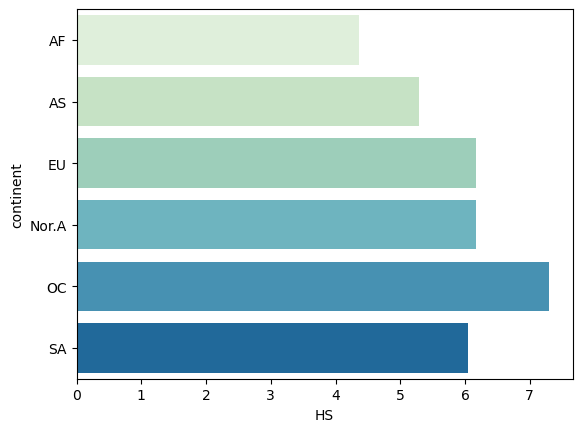

In [13]:
# 대륙별 행복지수 수평막대그래프 
import seaborn as sns
plt.style.use('default')
palette = sns.set_palette("GnBu")
sns.barplot('HS','continent', data=HS_mean)

In [17]:
# 나라별 행복지수 수평막대그래프 
ndfnor['country']= ndfnor['country'].astype("object")
HS_mean_country = ndfnor.groupby(['country'])['HS'].mean().to_frame().sort_values(by='HS',ascending = False)
#HS_mean_country = HS_mean_country.reset_index()
HS_mean_country

,HS
country,
Denmark,7.680400
Finland,7.597154
Switzerland,7.548300
Norway,7.512400
Netherlands,7.466286
...,...
Rwanda,3.654417
Afghanistan,3.594667
Togo,3.555000


In [18]:
HS_mean_country_top = HS_mean_country.head(5)
HS_mean_country_bot = HS_mean_country.tail(5)
HS_mean_country = pd.concat([HS_mean_country_top,HS_mean_country_bot])
HS_mean_country.index

Index(['Denmark', 'Finland', 'Switzerland', 'Norway', 'Netherlands', 'Rwanda',
       'Afghanistan', 'Togo', 'Burundi', 'Central African Republic'],
      dtype='object', name='country')

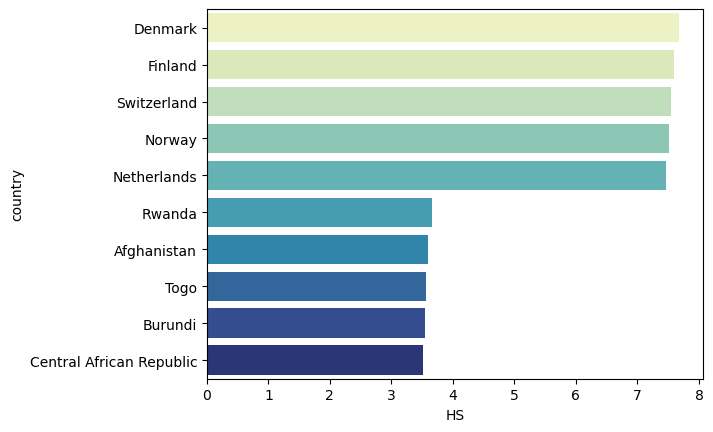

In [20]:
sns.barplot(data=HS_mean_country,x='HS', y=HS_mean_country.index, palette = 'YlGnBu')
#sns.barplot(data= mental , x ='DALYs Mental disorders', y = mental.index )
plt.show()

In [21]:
ndfnor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881 entries, 0 to 1880
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   log_gdp      1881 non-null   float64 
 1   social       1881 non-null   float64 
 2   life_exp     1881 non-null   float64 
 3   freedom      1881 non-null   float64 
 4   generosity   1881 non-null   float64 
 5   corruption   1881 non-null   float64 
 6   schooling    1881 non-null   float64 
 7   alcohol      1881 non-null   float64 
 8   suicide      1881 non-null   float64 
 9   obesity      1881 non-null   float64 
 10  birth        1881 non-null   float64 
 11  mental       1881 non-null   float64 
 12  HS           1881 non-null   float64 
 13  year         1881 non-null   category
 14  country      1881 non-null   object  
 15  country_num  1881 non-null   category
 16  continent    1881 non-null   category
 17  cluster      1881 non-null   int32   
dtypes: category(3), float64(13),

In [23]:
# 2. 상관계수 히트맵
data = ndfnor.drop(['cluster','continent','country_num','country','year'],axis=1)
np.triu(np.ones_like(data.corr()))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [24]:
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
print(mask)

[[ True  True  True  True  True  True  True  True  True  True  True  True
   True]
 [False  True  True  True  True  True  True  True  True  True  True  True
   True]
 [False False  True  True  True  True  True  True  True  True  True  True
   True]
 [False False False  True  True  True  True  True  True  True  True  True
   True]
 [False False False False  True  True  True  True  True  True  True  True
   True]
 [False False False False False  True  True  True  True  True  True  True
   True]
 [False False False False False False  True  True  True  True  True  True
   True]
 [False False False False False False False  True  True  True  True  True
   True]
 [False False False False False False False False  True  True  True  True
   True]
 [False False False False False False False False False  True  True  True
   True]
 [False False False False False False False False False False  True  True
   True]
 [False False False False False False False False False False False  True
   True]
 [Fa

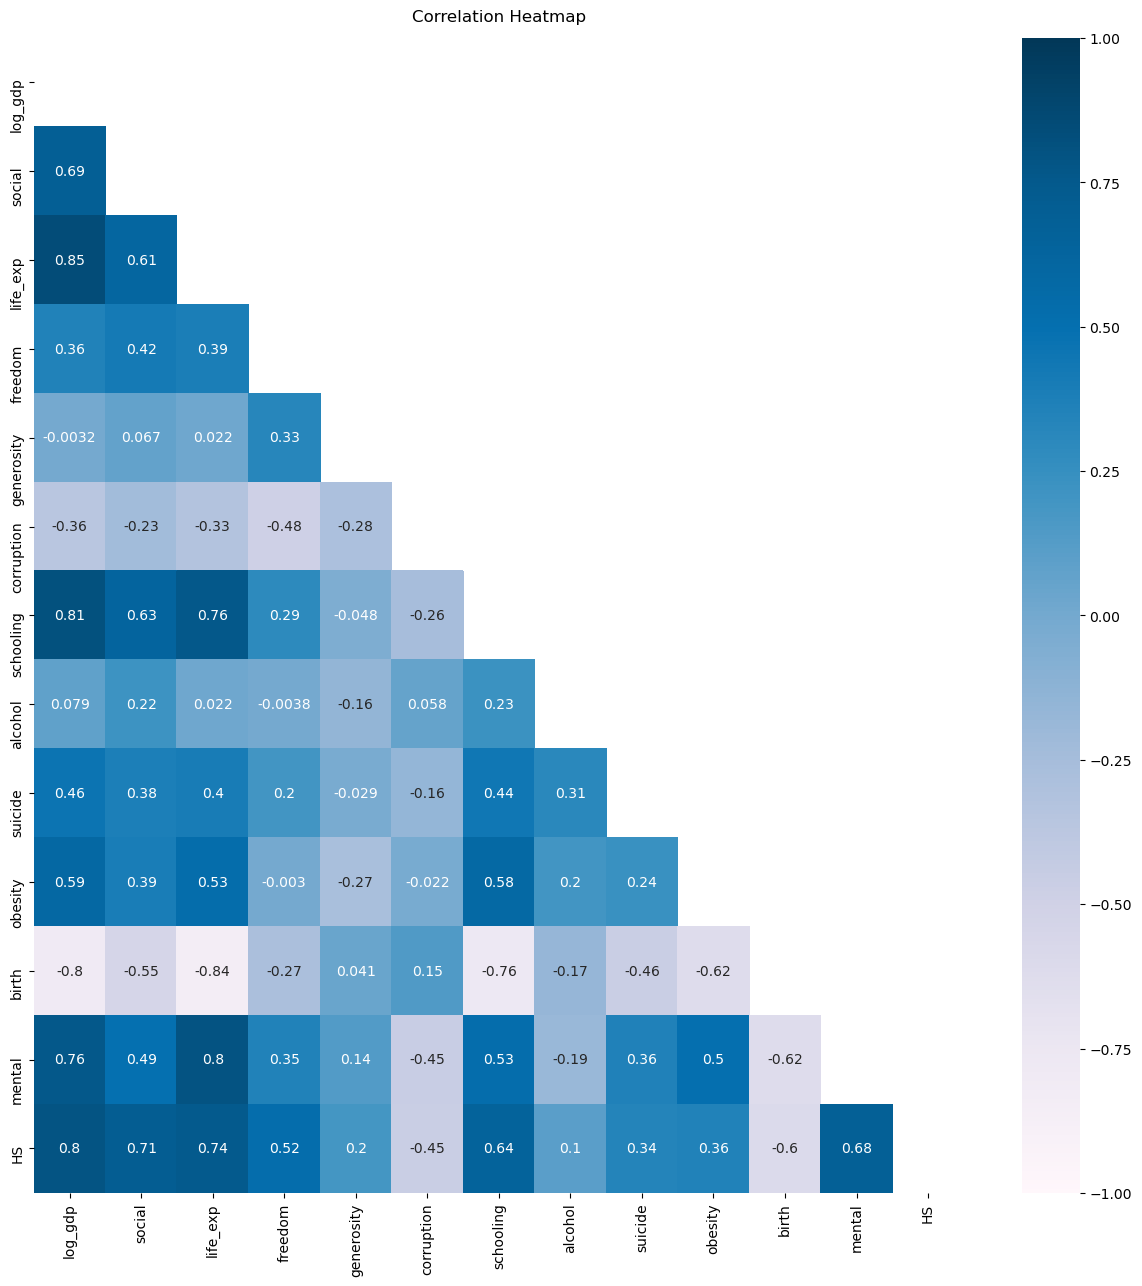

In [28]:
#  상관계수 히트맵
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), 
            mask=mask, 
            vmin=-1, 
            vmax = 1, 
            annot=True, 
            cmap="PuBu", 
            cbar = True)
plt.title('Correlation Heatmap', pad = 12)
plt.show()

In [29]:
print(data.corr()[['HS']].sort_values(by='HS', ascending=False))
data_ylabels = data.corr()[['HS']].sort_values(by='HS', ascending=False).index.tolist()

                  HS
HS          1.000000
log_gdp     0.795665
life_exp    0.744608
social      0.711477
mental      0.681296
schooling   0.643004
freedom     0.524597
obesity     0.355662
suicide     0.343523
generosity  0.195073
alcohol     0.104403
corruption -0.454071
birth      -0.599434


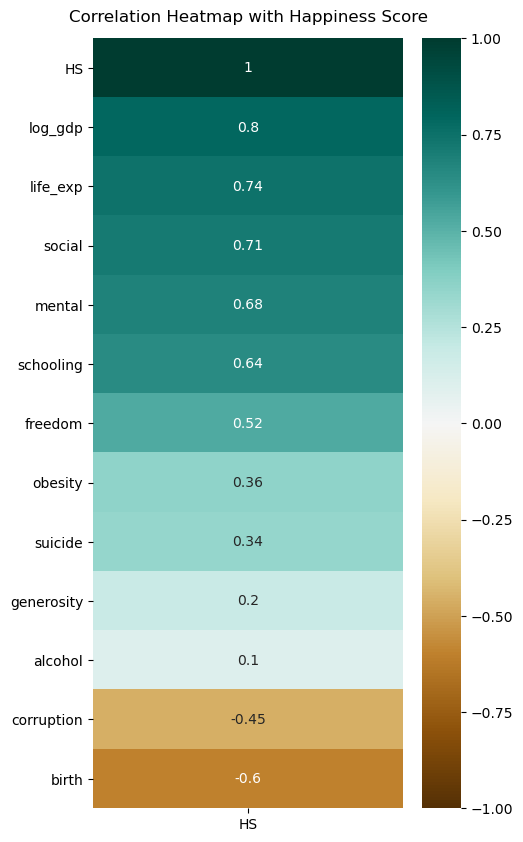

In [33]:
data.corr()[['HS']].sort_values(by='HS', ascending=False).index
fig, ax = plt.subplots(figsize=(5, 10))
sns.heatmap(data.corr()[['HS']].sort_values(by='HS', ascending=False), 
            vmin = -1, vmax = 1, annot=True, cmap="BrBG")
ax.set_title('Correlation Heatmap with Happiness Score', pad = 12)
ax.set_yticklabels(data_ylabels, rotation=0) # y축을 가로형으로 변환
plt.show()

<AxesSubplot:xlabel='log_gdp', ylabel='life_exp'>

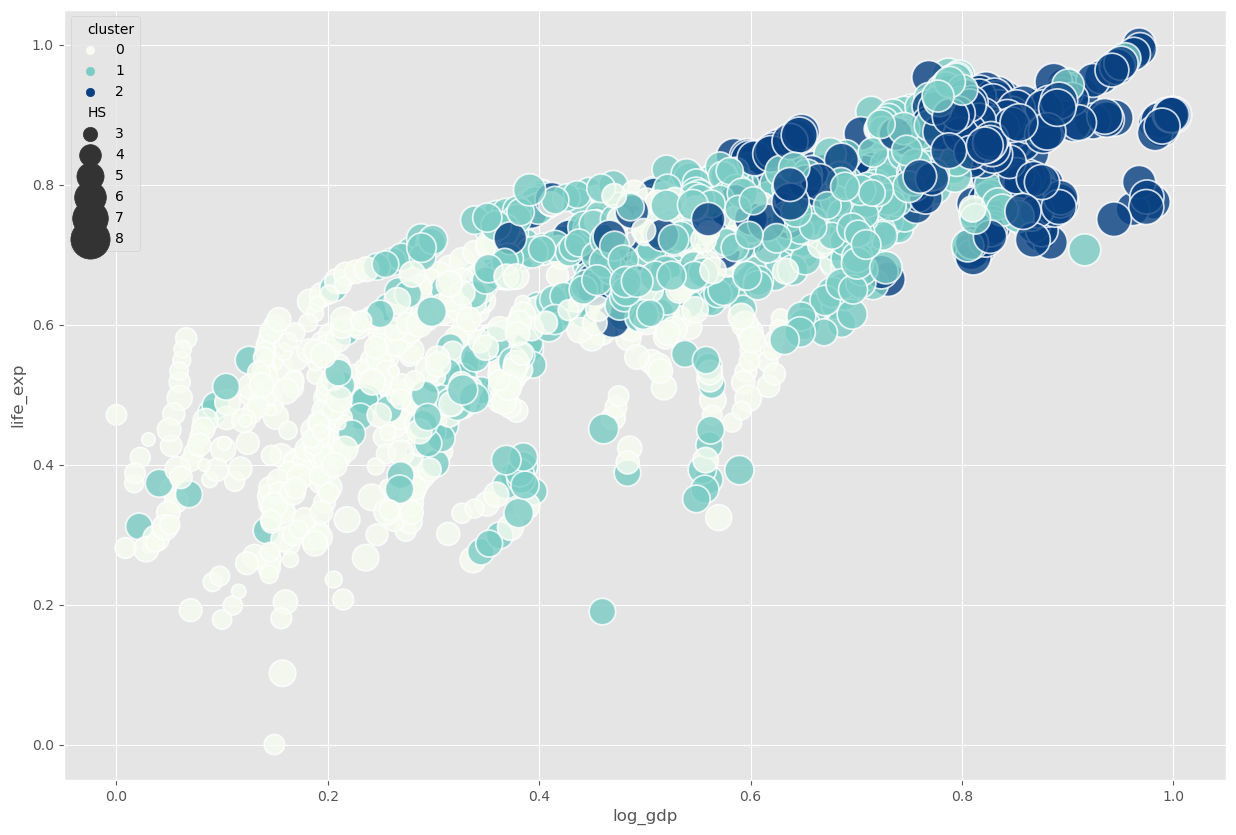

In [42]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [15, 10]
sns.scatterplot(data=ndfnor, 
                x="log_gdp", 
                y="life_exp", 
                size="HS", 
                hue='cluster',
                alpha = 0.8, 
                palette="GnBu",
                legend=True, 
                sizes=(20, 800))

<AxesSubplot:xlabel='corruption', ylabel='birth'>

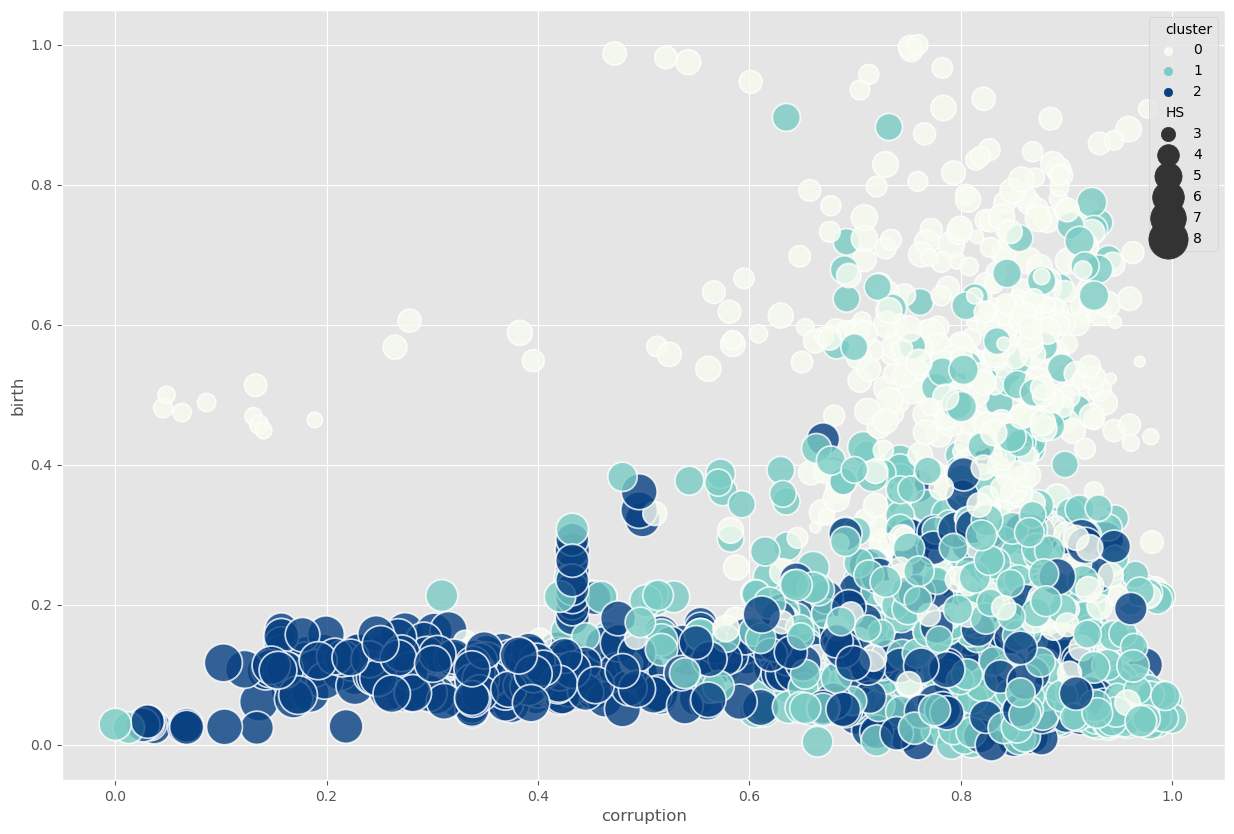

In [43]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [15, 10]
sns.scatterplot(data=ndfnor, 
                x="corruption", 
                y="birth", 
                size="HS", 
                hue='cluster',
                alpha = 0.8, 
                palette="GnBu",
                legend=True, 
                sizes=(20, 800))

#### 주피터 노트북에서 _xsrf' argument missing from POST 오류때문에 저장이 안 돼서 해결하다가 제가 저장 못 한 노트북을 실수로 닫기 눌러버렸어요...ㅠ 다 날아가서 어느정도 다시 하긴 했는데 4번은 최대한 빨리 해서 추가 업로드 할게요!  그리고 대략적인것만 그린거라 제목같은거 마저 추가 하겠습니다 !